In [1]:
import torch

import tr_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
%load_ext autoreload
%autoreload 2

In [37]:
# default_path = 'results/min_tree_ppo/node/'
default_path = 'results/min_tree_ppo/node_cuda/'
agent_path = '250411_1603#n10_e33_g22_g_3-2he'
correl_path = f'{default_path}{agent_path}'

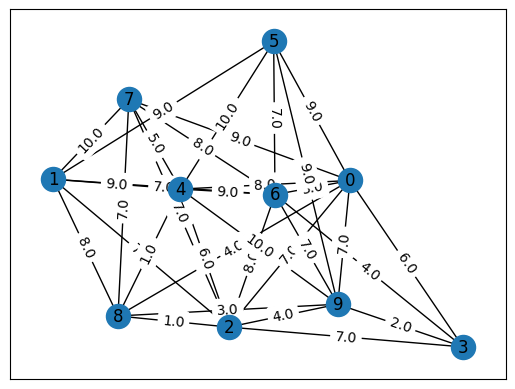

,0,1,2,3,4,5,6,7,8,9
iter,,,,,,,,,,
0,125,112,121,88,129,103,122,115,110,127
1,136,113,109,96,126,98,120,112,115,127
2,114,115,123,92,125,102,139,107,106,129
3,130,105,120,88,134,96,123,114,109,133
4,130,115,120,92,119,96,129,117,114,120
...,...,...,...,...,...,...,...,...,...,...
995,113,114,131,93,128,105,131,113,106,118
996,132,105,131,85,121,115,125,103,111,124
997,141,114,129,85,110,96,142,112,101,122


In [38]:
actions_df = pd.read_csv(f'{correl_path}/actions_debug.csv', index_col=0)
graph = torch.load(f'{correl_path}/graph.pt', weights_only=False)
util.show_data(graph)
actions_df

In [39]:
degrees = util.get_out_edges(graph)
torch.stack([graph.x[:, 0], degrees])

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 6., 8., 4., 8., 5., 8., 6., 6., 7.]])

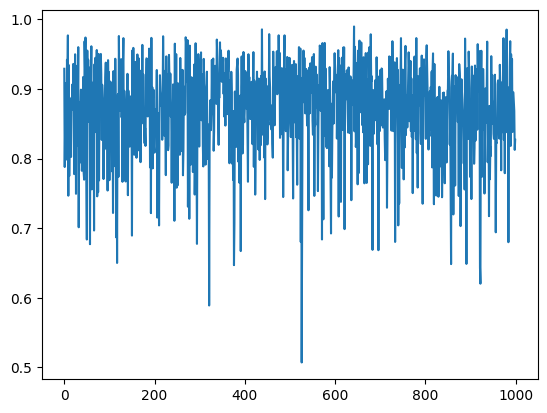

In [40]:


correlations = []
for _, row in actions_df.iterrows():
    corr, _ = pearsonr(degrees, row)
    correlations.append(corr)
plt.plot(correlations)